In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned.csv')

In [2]:
df.head()

,Unnamed: 0,tookpost,inputstate,gender,educ,race,CC16_331_1,CC16_331_2,CC16_331_3,CC16_331_7,...,CC16_426_1,CC16_426_2,CC16_426_3,CC16_426_5,CC16_418a,CC16_426_4,CC16_410a,voted,age,faminc_int
0,0,1,New Hampshire,Female,High school graduate,White,0,1,0,1,...,0.0,3.0,1.0,1.0,0.0,2.0,Donald Trump (Republican),1,49,54999.0
1,4,1,Colorado,Female,4-year,White,1,0,1,0,...,2.0,2.0,3.0,3.0,0.0,2.0,Hillary Clinton (Democrat),1,36,64999.0
2,5,1,Alabama,Female,High school graduate,Mixed,1,1,0,1,...,4.0,4.0,4.0,4.0,0.0,4.0,I didn't vote in this election,0,55,5000.0
3,6,1,Texas,Male,High school graduate,White,0,1,0,1,...,0.0,0.0,0.0,3.0,0.0,4.0,Donald Trump (Republican),1,56,24999.0
4,8,1,Georgia,Male,High school graduate,White,0,1,0,1,...,0.0,1.0,2.0,3.0,0.0,1.0,Donald Trump (Republican),1,55,34999.0


In [3]:
for col in df.columns.sort_values():
    print(col)

CC16_327
CC16_330a
CC16_330b
CC16_330d
CC16_330e
CC16_331_1
CC16_331_2
CC16_331_3
CC16_331_7
CC16_332a
CC16_332b
CC16_332c
CC16_332d
CC16_332e
CC16_332f
CC16_333a
CC16_333b
CC16_333c
CC16_333d
CC16_334a
CC16_334b
CC16_334c
CC16_334d
CC16_335
CC16_351B
CC16_351E
CC16_351F
CC16_351G
CC16_351H
CC16_351I
CC16_351K
CC16_410a
CC16_414_1
CC16_414_2
CC16_414_3
CC16_414_4
CC16_414_5
CC16_414_6
CC16_417a_1
CC16_417a_2
CC16_417a_3
CC16_417a_4
CC16_417a_5
CC16_418a
CC16_421a
CC16_422c
CC16_422d
CC16_422e
CC16_422f
CC16_426_1
CC16_426_2
CC16_426_3
CC16_426_4
CC16_426_5
Unnamed: 0
age
child18
edloan
educ
employ
faminc
faminc_int
gender
hispanic
ideo5
immstat
inputstate
inputstate_post
investor
marstat
milstat_1
ownhome
pew_bornagain
pew_religimp
pid3
race
religpew
sexuality
tookpost
trans
union
unionhh
voted
votereg_post


to do: clean more columns, convert to numerical (like survey questions, education)

Let's explore some basic distributions:

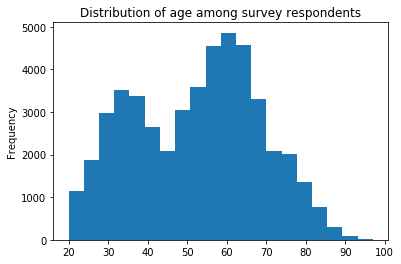

In [15]:
_ = df['age'].plot(kind = 'hist', bins = 20)
_ = plt.title("Distribution of age among survey respondents")
plt.show()

In [29]:
df['age'].describe()

count    48125.000000
mean        52.448623
std         16.138152
min         20.000000
25%         38.000000
50%         54.000000
75%         65.000000
max         97.000000
Name: age, dtype: float64

Median age is 54, mean is 52. Distribution appears to be possibly bimodal. 

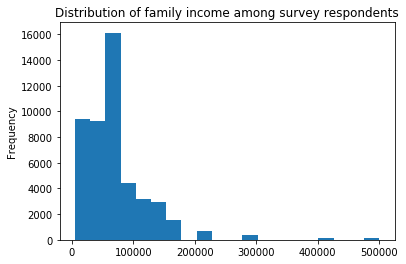

In [31]:
_ = df['faminc_int'].plot(kind = 'hist', bins = 20)
_ = plt.title("Distribution of family income among survey respondents")
plt.show()

pretty right skewed

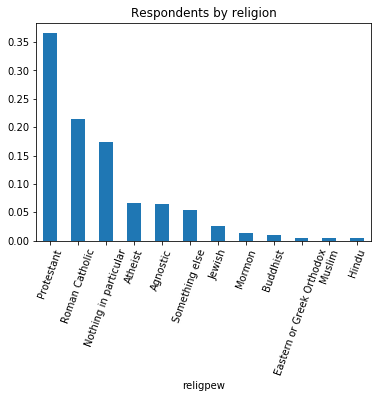

In [43]:
religions = df.groupby(['religpew']).size().sort_values(ascending = False) / df.shape[0]
_ = religions.plot(kind= 'bar', rot = 70)
_ = plt.title("Respondents by religion")
plt.show()

Break down things by party ID, vote? double bar charts, stacked histograms, etc.

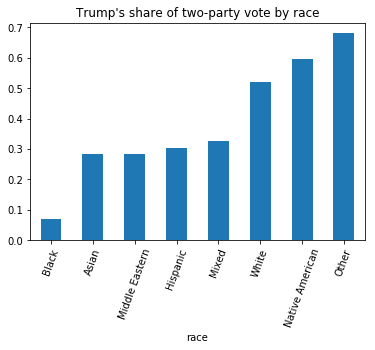

In [15]:
#df.loc[df['CC16_410a'] == 'Donald Trump (Republican)'].groupby(['race', 'CC16_410a']).size()

Trump_race = df.loc[df['CC16_410a'] == 'Donald Trump (Republican)'].groupby(['race']).size()

Clinton_race = df.loc[df['CC16_410a'] == 'Hillary Clinton (Democrat)'].groupby(['race']).size()

race_ratio = Trump_race / (Trump_race + Clinton_race)

race_ratio.sort_values(inplace = True)

_ = race_ratio.plot(kind= 'bar', rot = 70)
_ = plt.title("Trump's share of two-party vote by race")
plt.show()

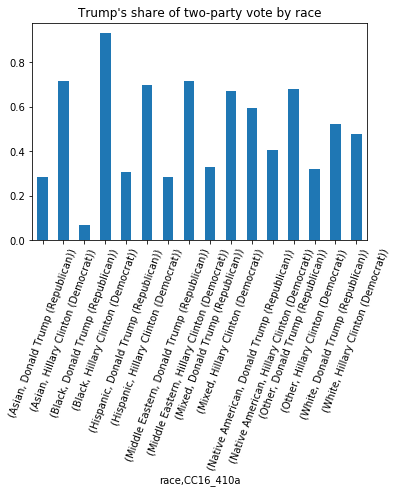

In [26]:
d = df.loc[(df['CC16_410a'] == 'Donald Trump (Republican)') 
       | (df['CC16_410a'] == 'Hillary Clinton (Democrat)')].groupby(['race', 'CC16_410a']).size()

total = df.loc[(df['CC16_410a'] == 'Donald Trump (Republican)') 
       | (df['CC16_410a'] == 'Hillary Clinton (Democrat)')].groupby(['race']).size()

d = d / total

_ = d.plot(kind= 'bar', rot = 70)
_ = plt.title("Trump's share of two-party vote by race")
plt.show()

In [23]:
df.loc[(df['CC16_410a'] == 'Donald Trump (Republican)') 
       | (df['CC16_410a'] == 'Hillary Clinton (Democrat)')].groupby(['race', 'CC16_410a']).size()

race             CC16_410a                 
Asian            Donald Trump (Republican)       286
                 Hillary Clinton (Democrat)      724
Black            Donald Trump (Republican)       247
                 Hillary Clinton (Democrat)     3338
Hispanic         Donald Trump (Republican)       741
                 Hillary Clinton (Democrat)     1695
Middle Eastern   Donald Trump (Republican)        17
                 Hillary Clinton (Democrat)       43
Mixed            Donald Trump (Republican)       244
                 Hillary Clinton (Democrat)      500
Native American  Donald Trump (Republican)       182
                 Hillary Clinton (Democrat)      124
Other            Donald Trump (Republican)       320
                 Hillary Clinton (Democrat)      150
White            Donald Trump (Republican)     15156
                 Hillary Clinton (Democrat)    13888
dtype: int64

In [25]:
total = df.loc[(df['CC16_410a'] == 'Donald Trump (Republican)') 
       | (df['CC16_410a'] == 'Hillary Clinton (Democrat)')].groupby(['race']).size()

https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/

https://stackoverflow.com/questions/40420240/grouped-bar-graph-pandas